In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv("data/city_data.csv")
ride_data_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset

pyber_combined_df = pd.merge(city_data_df, ride_data_df, on="city")

# Display the data table for preview

pyber_combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#create a new list to get the values i want
pyber_analysis_df = pyber_combined_df[['city', 'fare', 'type', 'ride_id', 'driver_count']]

#total rides is this formatting
total_rides = pyber_analysis_df.groupby('city')['ride_id'].count()

#total fares is this - to calculate the average
total_fare = pyber_analysis_df.groupby('city')['fare'].sum()

#average fares set to a variable
average_fare = (total_fare / total_rides)

total_rides_df = pd.DataFrame(total_rides)
total_rides_df.columns = ['total rides']

total_fare_df = pd.DataFrame(total_fare)
total_fare_df.columns = ['total fare']

average_fare_df = pd.DataFrame(average_fare)
average_fare_df.columns = ['average fare']

#additional functions to identify key bits of information
city_type_df = pyber_combined_df[['city','type']]
city_type_df_cleaned = city_type_df.drop_duplicates()
total_drivers_df = pyber_combined_df[['city','driver_count']]
total_drivers_df_cleaned = total_drivers_df.drop_duplicates()


#merge dataframe into a single, combined dataframe
combined_analysis_df = total_fare_df.merge(total_rides_df, on="city")
total_combined_df = combined_analysis_df.merge(average_fare_df, on="city")
type_combined_df = total_combined_df.merge(city_type_df_cleaned, on="city")
pyber_scatter_data_df = type_combined_df.merge(total_drivers_df_cleaned, on="city")

pyber_scatter_data_df.head()

,city,total fare,total rides,average fare,type,driver_count
0,Amandaburgh,443.55,18,24.641667,Urban,12
1,Barajasview,557.31,22,25.332273,Urban,26
2,Barronchester,582.76,16,36.422500,Suburban,11
3,Bethanyland,593.21,18,32.956111,Suburban,22
4,Bradshawfurt,400.64,10,40.064000,Rural,7


In [3]:
#narrow down merged dataframe into three seprate dataframes based on city type

#urban dataframe
urban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Urban"]
urban_fares = urban_scatter['total fare'].sum()


#rural dataframe
rural_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Rural"]
rural_fares = rural_scatter['total fare'].sum()


#suburban dataframe
suburban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Suburban"]
suburban_fares = suburban_scatter['total fare'].sum()

In [4]:
#urban scatter plot df

urban_x_axis = urban_scatter['total rides']
urban_y_axis = urban_scatter['average fare']
urban_sizes = urban_scatter['driver_count'] * 10

#suburban scatter plot df

suburban_x_axis = suburban_scatter['total rides']
suburban_y_axis = suburban_scatter['average fare']
suburban_sizes = suburban_scatter['driver_count'] * 10

#rural scatter plot df

rural_x_axis = rural_scatter['total rides']
rural_y_axis = rural_scatter['average fare']
rural_sizes = rural_scatter['driver_count'] * 10

## Bubble Plot of Ride Sharing Data

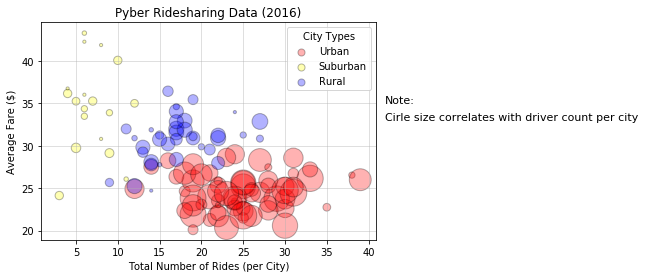

In [5]:
# Build the scatter plots for each city types

urban_scatterplot= plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="red", sizes=urban_sizes, edgecolors="black",
            s=urban_x_axis, alpha=0.3)

rural_scatterplot = plt.scatter(rural_x_axis, rural_y_axis, marker="o", sizes=rural_sizes, facecolors="yellow", edgecolors="black",
            s=rural_x_axis, alpha=0.3)

suburban_scatter_plot = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", sizes=suburban_sizes, facecolors="blue", edgecolors="black",
            s=suburban_x_axis, alpha=0.3)

# Incorporate the other graph properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title=("City Types"), 
                    markerscale=0.5, 
                    labels=("Urban", "Suburban", "Rural"), 
                    loc="upper right")

legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size

plt.text(42, 35, 'Note:', fontsize=11)
plt.text(42, 33, 'Cirle size correlates with driver count per city', fontsize=11)
plt.grid(alpha=0.5)


# Save Figure
plt.savefig("./Pyber Ridesharing Data (2016).png")

plt.show()

## Total Fares by City Type

In [6]:
#identify key info for pie graph

total_fares_for_chart = pyber_scatter_data_df['total fare'].sum()


#urban dataframe
urban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Urban"]
urban_fares = urban_scatter['total fare'].sum()


#rural dataframe
rural_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Rural"]
rural_fares = rural_scatter['total fare'].sum()

#suburban dataframe
suburban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Suburban"]
suburban_fares = suburban_scatter['total fare'].sum()


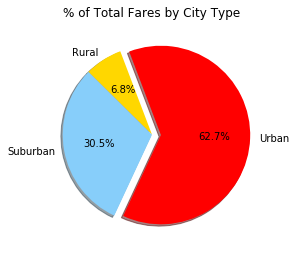

In [7]:
# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_fares, rural_fares, suburban_fares]

# The colors of each section of the pie chart
colors = ['red','gold', 'lightskyblue']
explode = (0.1, 0, 0)
plt.figure(figsize=(4, 8,))

#title
plt.title("% of Total Fares by City Type")

pyber_pie = plt.pie(sizes, labels=labels, colors=colors,
        radius=1.0, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=245)

plt.savefig("./Pyber_PercentTotalFarebyType.png")

plt.show()




## Total Rides by City Type

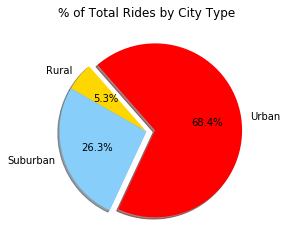

In [7]:
#identify key info for pie graph

total_rides_for_chart = pyber_scatter_data_df['total rides'].sum()


#urban dataframe
urban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Urban"]
urban_rides = urban_scatter['total rides'].sum()


#rural dataframe
rural_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Rural"]
rural_rides = rural_scatter['total rides'].sum()


#suburban dataframe
suburban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Suburban"]
suburban_rides = suburban_scatter['total rides'].sum()

##########

#pie chart information

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_rides, rural_rides, suburban_rides]

# The colors of each section of the pie chart
colors = ['red','gold', 'lightskyblue']
explode = (0.1, 0, 0)
plt.title("% of Total Rides by City Type")
plt.savefig("./Pyber_PercentTotalRidebyType.png")


pyber_pie = plt.pie(sizes, labels=labels, colors=colors,
        explode=explode, radius=1.0,
        autopct="%1.1f%%", shadow=True, startangle=245)

plt.savefig("./Pyber_PercentTotalRidesbyType.png")

plt.show()

## Total Drivers by City Type

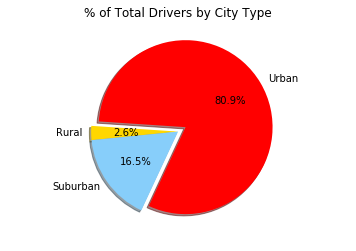

In [8]:
#identify key info for pie graph

total_drivers_for_chart = pyber_scatter_data_df['driver_count'].sum()


#urban dataframe
urban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Urban"]
urban_drivers = urban_scatter['driver_count'].sum()


#rural dataframe
rural_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Rural"]
rural_drivers = rural_scatter['driver_count'].sum()


#suburban dataframe
suburban_scatter = pyber_scatter_data_df.loc[pyber_scatter_data_df["type"] == "Suburban"]
suburban_drivers = suburban_scatter['driver_count'].sum()

##########

#pie chart information

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [urban_drivers, rural_drivers, suburban_drivers]

# The colors of each section of the pie chart
colors = ['red','gold', 'lightskyblue']

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("./Pyber_PercentDriversFarebyType.png")


pyber_pie = plt.pie(sizes, labels=labels, colors=colors,
        radius=1.0, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=245)

plt.savefig("./Pyber_PercentDriversFarebyType.png")


plt.show()